In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data

In [2]:
data = pd.read_csv('RFLFSODataFull.csv')

print("Dataset:")
data.head(5)

Dataset:


,FSO_Att,RFL_Att,AbsoluteHumidity,AbsoluteHumidityMax,AbsoluteHumidityMin,Distance,Frequency,Particulate,ParticulateMax,ParticulateMin,...,TemperatureMax,TemperatureMin,Time,Visibility,VisibilityMax,VisibilityMin,WindDirection,WindSpeed,WindSpeedMax,WindSpeedMin
0,7.913289,6.927868,17.595709,17.615907,17.340148,2115.338398,83500000000,0.0,0.0,0.0,...,26.603030,24.680849,9,65884.51846,72336.362233,65617.543754,88.755450,3.057066,6.863808,3.007939
1,7.451176,4.412096,17.549693,17.572415,17.299439,2113.999257,73500000000,0.0,0.0,0.0,...,26.377164,24.313108,9,64963.41092,68753.386153,60379.327485,99.790057,2.727910,6.468903,2.537393
2,7.072747,6.268740,17.290230,17.644014,16.037894,2118.689047,83500000000,0.0,0.0,0.0,...,27.670822,23.150277,10,54794.28107,54821.773817,50850.155963,65.730085,1.674810,2.826916,1.640809
3,6.949288,4.317853,16.820880,17.066776,15.895622,2114.632339,73500000000,0.0,0.0,0.0,...,26.522100,23.174815,10,50205.64159,52519.927530,45374.510898,88.127497,0.962068,2.780643,0.886951
4,7.361052,6.114514,16.813820,17.953974,15.227225,2116.786055,83500000000,0.0,0.0,0.0,...,26.305736,24.864100,10,59038.32599,64418.329138,54461.246506,84.167414,1.881007,4.476298,1.874052


In [3]:
print("\nRF Dataset Dimensions:")
data.shape


RF Dataset Dimensions:


(91379, 27)

In [4]:
print("\nRF Dataset Data Types:")
data.dtypes


RF Dataset Data Types:


FSO_Att                  float64
RFL_Att                  float64
AbsoluteHumidity         float64
AbsoluteHumidityMax      float64
AbsoluteHumidityMin      float64
Distance                 float64
Frequency                  int64
Particulate              float64
ParticulateMax           float64
ParticulateMin           float64
RainIntensity            float64
RainIntensityMax         float64
RainIntensityMin         float64
RelativeHumidity         float64
SYNOPCode                  int64
Temperature              float64
TemperatureDifference    float64
TemperatureMax           float64
TemperatureMin           float64
Time                       int64
Visibility               float64
VisibilityMax            float64
VisibilityMin            float64
WindDirection            float64
WindSpeed                float64
WindSpeedMax             float64
WindSpeedMin             float64
dtype: object

In [5]:
data = data.drop_duplicates()
print(data.isnull().sum())


FSO_Att                  0
RFL_Att                  0
AbsoluteHumidity         0
AbsoluteHumidityMax      0
AbsoluteHumidityMin      0
Distance                 0
Frequency                0
Particulate              0
ParticulateMax           0
ParticulateMin           0
RainIntensity            0
RainIntensityMax         0
RainIntensityMin         0
RelativeHumidity         0
SYNOPCode                0
Temperature              0
TemperatureDifference    0
TemperatureMax           0
TemperatureMin           0
Time                     0
Visibility               0
VisibilityMax            0
VisibilityMin            0
WindDirection            0
WindSpeed                0
WindSpeedMax             0
WindSpeedMin             0
dtype: int64


## FOR FSO

In [6]:
fso_data = data.drop("RFL_Att", axis = 1).copy()

In [ ]:
fso_data['SYNOPCode'] = fso_data['SYNOPCode'].astype('category')


print(fso_data.dtypes) 
print(fso_data['SYNOPCode'].head()) 

FSO_Att                   float64
AbsoluteHumidity          float64
AbsoluteHumidityMax       float64
AbsoluteHumidityMin       float64
Distance                  float64
Frequency                   int64
Particulate               float64
ParticulateMax            float64
ParticulateMin            float64
RainIntensity             float64
RainIntensityMax          float64
RainIntensityMin          float64
RelativeHumidity          float64
SYNOPCode                category
Temperature               float64
TemperatureDifference     float64
TemperatureMax            float64
TemperatureMin            float64
Time                        int64
Visibility                float64
VisibilityMax             float64
VisibilityMin             float64
WindDirection             float64
WindSpeed                 float64
WindSpeedMax              float64
WindSpeedMin              float64
dtype: object
0    0
1    0
2    0
3    0
4    0
Name: SYNOPCode, dtype: category
Categories (7, int64): [0, 3, 4, 5

In [8]:
print(fso_data['SYNOPCode'].value_counts())

SYNOPCode
0    56964
6    25018
5     6605
8     1716
4      466
7      419
3      191
Name: count, dtype: int64


In [9]:
print("\nRF Dataset Summary Statistics:")
fso_data.describe()


RF Dataset Summary Statistics:


,FSO_Att,AbsoluteHumidity,AbsoluteHumidityMax,AbsoluteHumidityMin,Distance,Frequency,Particulate,ParticulateMax,ParticulateMin,RainIntensity,...,TemperatureMax,TemperatureMin,Time,Visibility,VisibilityMax,VisibilityMin,WindDirection,WindSpeed,WindSpeedMax,WindSpeedMin
count,91379.000000,91379.000000,91379.000000,91379.000000,91379.000000,9.137900e+04,91379.000000,91379.000000,91379.000000,91379.000000,...,91379.000000,91379.000000,91379.000000,91379.000000,91379.000000,91379.000000,91379.000000,91379.000000,91379.000000,91379.000000
mean,6.769458,9.553919,10.032760,9.076251,3297.930328,7.850005e+10,27.065979,28.417120,25.717089,0.246973,...,13.166020,11.904558,11.373193,32986.417484,34636.684647,31331.618978,89.043304,0.739065,1.851020,0.702242
std,3.903843,5.858577,6.162798,5.575927,1224.305893,5.000027e+09,72.134023,75.761896,68.595239,1.642323,...,9.589755,8.694028,6.942229,24713.874445,25978.845228,23497.873065,26.415610,0.871314,1.762698,0.828796
min,0.788363,1.141556,1.238270,1.049744,2012.000148,7.350000e+10,0.000000,0.000000,0.000000,0.000000,...,-6.693373,-7.270075,0.000000,10.151990,11.029667,9.484346,0.000000,0.000000,0.000000,0.000000
25%,3.473063,4.958993,5.205861,4.709511,2019.431812,7.350000e+10,0.000000,0.000000,0.000000,0.000000,...,4.905387,4.438425,5.000000,11158.598400,11721.447542,10588.793237,82.976727,0.076749,0.512667,0.072912
50%,6.336167,6.870737,7.205499,6.524046,2959.863686,8.350000e+10,0.000000,0.000000,0.000000,0.000000,...,10.803943,9.774467,11.000000,26378.636210,27686.214032,25047.188462,90.867362,0.437995,1.323101,0.416274
75%,8.664984,14.049470,14.782679,13.379256,4820.890157,8.350000e+10,16.947618,17.775980,16.038090,0.000000,...,22.470382,20.322434,17.000000,53493.821285,56092.212376,50797.690402,98.482652,1.088621,2.681788,1.036574
max,32.455222,24.790883,26.407305,24.268431,4827.999971,8.350000e+10,1621.001906,1753.747866,1500.666382,87.264777,...,40.771383,36.724191,23.000000,75004.999150,82503.130084,74999.343414,360.000000,7.799086,16.421115,7.252319


# FSO_Feature Selection

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

def feature_selection(data, target_column, drop_columns, rmse_threshold=0.1, r2_threshold=0.02):

    data = data.drop(columns=drop_columns, errors='ignore')
    

    X = data.drop(columns=[target_column])
    y = data[target_column]

    model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
    
    rmse_list = []
    r2_list = []
    removed_features = []
    decisions = []  
    
    current_features = list(X.columns)
    
    model.fit(X[current_features], y)
    baseline_rmse = mean_squared_error(y, model.predict(X[current_features]), squared=False)
    baseline_r2 = r2_score(y, model.predict(X[current_features]))
    rmse_list.append(baseline_rmse)
    r2_list.append(baseline_r2)

    print(f"Initial RMSE: {baseline_rmse}, R²: {baseline_r2}")
    
    while len(current_features) > 1:
     
        model.fit(X[current_features], y)
        
 
        y_pred = model.predict(X[current_features])
        rmse = mean_squared_error(y, y_pred, squared=False)
        r2 = r2_score(y, y_pred)
       
        rmse_list.append(rmse)
        r2_list.append(r2)
       
        feature_importances = model.feature_importances_
        least_important_feature_idx = np.argmin(feature_importances)
        least_important_feature = current_features[least_important_feature_idx]
        
        rmse_increase = rmse - baseline_rmse
        r2_decrease = baseline_r2 - r2

        print(f"Removing feature: {least_important_feature}")
        print(f"RMSE increase: {rmse_increase:.3f}, R² decrease: {r2_decrease:.3f}")
        
        if rmse_increase > rmse_threshold or r2_decrease > r2_threshold:
            print(f"Stopping selection. RMSE increase ({rmse_increase:.3f}) > {rmse_threshold} or R² decrease ({r2_decrease:.3f}) > {r2_threshold}")
            decisions.append(f"Stop: RMSE increase {rmse_increase:.3f}, R² decrease {r2_decrease:.3f}")
            break
        else:
            
            removed_features.append(least_important_feature)
            current_features.pop(least_important_feature_idx)
            baseline_rmse = rmse
            baseline_r2 = r2
            decisions.append(f"Removed: {least_important_feature}")

    fig, ax1 = plt.subplots(figsize=(10, 6))


    ax1.plot(range(len(rmse_list)), rmse_list, 'b-o', label='RMSE')
    ax1.set_xlabel('Number of Features Removed', fontsize=12)
    ax1.set_ylabel('RMSE (dB)', color='blue', fontsize=12)
    ax1.tick_params(axis='y', labelcolor='blue')
    ax1.tick_params(axis='x', rotation=45)  
    ax1.grid(alpha=0.5)

    ax1.set_xticks(range(len(removed_features)))  
    ax1.set_xticklabels(removed_features, fontsize=10)

    ax2 = ax1.twinx()
    ax2.plot(range(len(r2_list)), r2_list, 'y-s', label='$R^2$', markersize=6)
    ax2.set_ylabel('$R^2$', color='gold', fontsize=12)
    ax2.tick_params(axis='y', labelcolor='gold')


    plt.title('Feature Selection Process - RMSE and $R^2$', fontsize=14, pad=20)
    fig.tight_layout()  
    fig.legend(loc='upper right', bbox_to_anchor=(0.85, 0.85), fontsize=10)
    plt.show()


    print("Important Features:", current_features)
    print("Removed Features:", removed_features)
    print("Decisions Log:")
    for decision in decisions:
        print(decision)
    
    return current_features, removed_features, rmse_list, r2_list, decisions

C:\Users\发烧了啊\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Initial RMSE: 0.2817088211871882, R²: 0.9947926010486952


C:\Users\发烧了啊\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Removing feature: Frequency
RMSE increase: 0.000, R² decrease: 0.000


C:\Users\发烧了啊\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Removing feature: RainIntensityMin
RMSE increase: 0.000, R² decrease: 0.000


C:\Users\发烧了啊\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Removing feature: RainIntensityMax
RMSE increase: -0.000, R² decrease: -0.000


C:\Users\发烧了啊\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Removing feature: SYNOPCode
RMSE increase: -0.000, R² decrease: -0.000


C:\Users\发烧了啊\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Removing feature: WindDirection
RMSE increase: 0.000, R² decrease: 0.000


C:\Users\发烧了啊\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Removing feature: RainIntensity
RMSE increase: -0.004, R² decrease: -0.000


C:\Users\发烧了啊\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Removing feature: WindSpeedMin
RMSE increase: -0.000, R² decrease: -0.000


C:\Users\发烧了啊\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Removing feature: AbsoluteHumidityMin
RMSE increase: -0.000, R² decrease: -0.000


C:\Users\发烧了啊\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Removing feature: AbsoluteHumidityMax
RMSE increase: -0.002, R² decrease: -0.000


C:\Users\发烧了啊\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Removing feature: WindSpeed
RMSE increase: -0.003, R² decrease: -0.000


C:\Users\发烧了啊\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Removing feature: WindSpeedMax
RMSE increase: 0.004, R² decrease: 0.000


C:\Users\发烧了啊\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Removing feature: TemperatureMax
RMSE increase: 0.006, R² decrease: 0.000


C:\Users\发烧了啊\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Removing feature: VisibilityMax
RMSE increase: -0.003, R² decrease: -0.000


C:\Users\发烧了啊\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Removing feature: TemperatureDifference
RMSE increase: -0.002, R² decrease: -0.000


C:\Users\发烧了啊\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Removing feature: ParticulateMax
RMSE increase: 0.029, R² decrease: 0.001


C:\Users\发烧了啊\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Removing feature: RelativeHumidity
RMSE increase: -0.000, R² decrease: -0.000


C:\Users\发烧了啊\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Removing feature: Time
RMSE increase: -0.001, R² decrease: -0.000


C:\Users\发烧了啊\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Removing feature: TemperatureMin
RMSE increase: 0.092, R² decrease: 0.004


C:\Users\发烧了啊\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Removing feature: Particulate
RMSE increase: -0.003, R² decrease: -0.000


C:\Users\发烧了啊\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Removing feature: AbsoluteHumidity
RMSE increase: 0.001, R² decrease: 0.000


C:\Users\发烧了啊\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Removing feature: VisibilityMin
RMSE increase: 0.094, R² decrease: 0.005


C:\Users\发烧了啊\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Removing feature: ParticulateMin
RMSE increase: -0.002, R² decrease: -0.000


C:\Users\发烧了啊\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Removing feature: Temperature
RMSE increase: 0.185, R² decrease: 0.014
Stopping selection. RMSE increase (0.185) > 0.1 or R² decrease (0.014) > 0.02


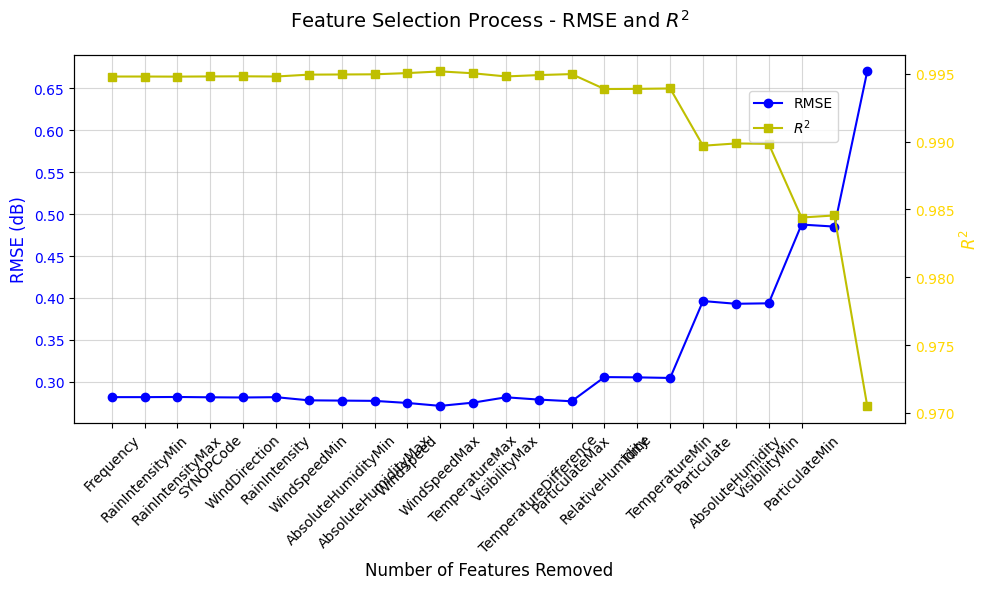

Important Features: ['Distance', 'Temperature', 'Visibility']
Removed Features: ['Frequency', 'RainIntensityMin', 'RainIntensityMax', 'SYNOPCode', 'WindDirection', 'RainIntensity', 'WindSpeedMin', 'AbsoluteHumidityMin', 'AbsoluteHumidityMax', 'WindSpeed', 'WindSpeedMax', 'TemperatureMax', 'VisibilityMax', 'TemperatureDifference', 'ParticulateMax', 'RelativeHumidity', 'Time', 'TemperatureMin', 'Particulate', 'AbsoluteHumidity', 'VisibilityMin', 'ParticulateMin']
Decisions Log:
Removed: Frequency
Removed: RainIntensityMin
Removed: RainIntensityMax
Removed: SYNOPCode
Removed: WindDirection
Removed: RainIntensity
Removed: WindSpeedMin
Removed: AbsoluteHumidityMin
Removed: AbsoluteHumidityMax
Removed: WindSpeed
Removed: WindSpeedMax
Removed: TemperatureMax
Removed: VisibilityMax
Removed: TemperatureDifference
Removed: ParticulateMax
Removed: RelativeHumidity
Removed: Time
Removed: TemperatureMin
Removed: Particulate
Removed: AbsoluteHumidity
Removed: VisibilityMin
Removed: ParticulateMin
St

In [12]:
important_features, removed_features, rmse_list, r2_list, decisions = feature_selection(
    data=fso_data,
    target_column='FSO_Att',
    drop_columns=[],  
    rmse_threshold=0.1,  
    r2_threshold=0.02    
)

# FSO_General Model

In [ ]:
from sklearn.model_selection import GridSearchCV



def general_model_evaluation(data, target_column, features):

    X = data[features]
    y = data[target_column]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    }

    rf = RandomForestRegressor(random_state=42)

    grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=1)
    grid_search.fit(X_train, y_train)

    # 获取最优参数
    best_params = grid_search.best_params_
    print(f"Optimal Parameters: {best_params}")

    best_model = grid_search.best_estimator_
    best_model.fit(X_train, y_train)

    y_train_pred = best_model.predict(X_train)
    train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
    train_r2 = r2_score(y_train, y_train_pred)

    print(f"Training RMSE: {train_rmse}, R^2: {train_r2}")

    y_test_pred = best_model.predict(X_test)
    test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
    test_r2 = r2_score(y_test, y_test_pred)

    print(f"Test RMSE: {test_rmse}, R^2: {test_r2}")

    return best_model, best_params, train_rmse, train_r2, test_rmse, test_r2



In [ ]:
general_model, general_params, train_rmse, train_r2, test_rmse, test_r2 = general_model_evaluation(
    data=fso_data,
    target_column='FSO_Att',
    features=['Distance', 'Temperature', 'Visibility']  
)

print("General Model 最优超参数:", general_params)
print("训练集性能 -> RMSE:", train_rmse, ", R²:", train_r2)
print("测试集性能 -> RMSE:", test_rmse, ", R²:", test_r2)

Optimal Parameters: {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 200}


C:\Users\发烧了啊\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Training RMSE: 1.1602074809082261, R^2: 0.9123385073612887
Test RMSE: 1.7890877187178773, R^2: 0.7861290250716451
General Model 最优超参数: {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 200}
训练集性能 -> RMSE: 1.1602074809082261 , R²: 0.9123385073612887
测试集性能 -> RMSE: 1.7890877187178773 , R²: 0.7861290250716451


C:\Users\发烧了啊\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


# FSO_Special Model

In [ ]:
import tempfile
os.environ["PYTHONIOENCODING"] = "utf-8"
os.environ['TMP'] = r'D:\Temp'
os.environ['TEMP'] = r'D:\Temp'
tempfile.tempdir = r'D:\Temp'

weather_categories = {
    0: "Clear",
    3: "Dust Strom",
    4: "Fog",
    5: "Drizzle",
    6: "Rain",
    7: "Snow",
    8: "Showers"
}


synop_columns = ['SYNOP_0', 'SYNOP_3', 'SYNOP_4', 'SYNOP_5', 'SYNOP_6', 'SYNOP_7', 'SYNOP_8']




def prepare_synop_data(data, target_column, synop_column, weather_categories):
    """
    按照 SYNOPCode 划分数据集并存储训练集和测试集。
    """
    synop_data_splits = {}
    
    for code, synop_name in weather_categories.items():
        print(f"准备数据集 - SYNOPCode {code} ({synop_name})")
        
        # 筛选当前 SYNOPCode 的数据
        filtered_data = data[data[synop_column] == code].copy()

        # 如果没有数据，跳过
        if filtered_data.empty:
            print(f"SYNOPCode {code} ({synop_name}) 没有数据")
            continue

        # 数据集划分前，移除所有与其他 SYNOPCode 相关的特征
        drop_columns = [synop_column]  # 添加原始 SYNOPCode 列
        drop_columns += [col for col in filtered_data.columns if 'SYNOPCode' in col]
        
        X = filtered_data.drop(columns=[target_column] + drop_columns, errors='ignore')
        y = filtered_data[target_column]
        
        # 划分训练集和测试集
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

        # 存储分割后的数据
        synop_data_splits[synop_name] = {
            'X_train': X_train,
            'X_test': X_test,
            'y_train': y_train,
            'y_test': y_test
        }
        
        print(f"训练集大小: {X_train.shape}, 测试集大小: {X_test.shape}, 剩余特征: {X_train.columns.tolist()}")

    return synop_data_splits


def train_individual_synop(data_splits, optimal_params):
    """
    使用提前划分好的数据训练模型，并记录性能指标。
    """
    results = {}
    trained_models = {}

    for synop_name, splits in data_splits.items():
        print(f"正在训练模型 - SYNOPCode: {synop_name}")
        
        # 提取训练集和测试集
        X_train = splits['X_train']
        X_test = splits['X_test']
        y_train = splits['y_train']
        y_test = splits['y_test']

        # 初始化并训练模型
        model = RandomForestRegressor(**optimal_params)
        model.fit(X_train, y_train)

        # 将模型存储
        trained_models[synop_name] = model

        # 获取训练集性能指标
        y_train_pred = model.predict(X_train)
        train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
        train_r2 = r2_score(y_train, y_train_pred)

        # 获取测试集性能指标（初始模型性能）
        y_test_pred = model.predict(X_test)
        test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
        test_r2 = r2_score(y_test, y_test_pred)

        # 获取特征重要性
        feature_importances = model.feature_importances_
        sorted_indices = feature_importances.argsort()[::-1]
        selected_feature_names = X_train.columns[sorted_indices].tolist()

        # 特征选择过程中的性能指标
        test_rmse_values = [test_rmse]  # 初始性能
        test_r2_values = [test_r2]      # 初始性能

        # 特征选择循环
        while len(sorted_indices) > 1: 
          
            model.fit(X_train.iloc[:, sorted_indices], y_train)

          
            y_test_pred = model.predict(X_test.iloc[:, sorted_indices])
            test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
            test_r2 = r2_score(y_test, y_test_pred)

            test_rmse_values.append(test_rmse)
            test_r2_values.append(test_r2)

         
            sorted_indices = sorted_indices[:-1]

        results[synop_name] = {
            'Training RMSE': train_rmse,
            'Training R²': train_r2,
            'Testing RMSE': test_rmse_values[-1],  
            'Testing R²': test_r2_values[-1],      
            'Features': selected_feature_names,
            'Feature Selection RMSE': test_rmse_values,
            'Feature Selection R²': test_r2_values
        }

        print(f"--- {synop_name} ---")
        print(f"Training RMSE: {train_rmse:.4f}, Training R²: {train_r2:.4f}")
        print(f"Initial Testing RMSE: {test_rmse_values[0]:.4f}, Initial Testing R²: {test_r2_values[0]:.4f}")
        print(f"Testing RMSE: {test_rmse_values[-1]:.4f}, Testing R²: {test_r2_values[-1]:.4f}")
        print(f"训练完成 - SYNOPCode {synop_name}\n")

    return results, trained_models



# 画图功能
def plot_feature_selection(results, weather_categories):
   
    for synop_code, synop_name in weather_categories.items():
        if synop_name not in results:
            print(f"--- {synop_name} --- 无数据 ---")
            continue


        metrics = results[synop_name]
        rmse_values = metrics['Feature Selection RMSE']
        r2_values = metrics['Feature Selection R²']
        features = metrics['Features']


        fig, ax1 = plt.subplots(figsize=(12, 6))
        ax2 = ax1.twinx()

        ax1.plot(range(len(rmse_values)), rmse_values, 'b-o', label='RMSE')
        ax1.set_xlabel('Removed Features', fontsize=12)
        ax1.set_ylabel('RMSE', color='blue', fontsize=12)
        ax1.tick_params(axis='y', labelcolor='blue')
        ax1.tick_params(axis='x', rotation=45)
        ax1.grid(alpha=0.5)


        ax1.set_xticks(range(len(features)))
        ax1.set_xticklabels(features, fontsize=10, rotation=90)


        ax2.plot(range(len(r2_values)), r2_values, 'r-s', label='$R^2$', markersize=6)
        ax2.set_ylabel('$R^2$', color='red', fontsize=12)
        ax2.tick_params(axis='y', labelcolor='red')


        plt.title(f'Feature Selection Process - {synop_name}', fontsize=14, pad=20)
        fig.tight_layout()
        fig.legend(loc='upper right', bbox_to_anchor=(0.85, 0.85), fontsize=10)

        plt.show()


In [ ]:
optimal_params = {
    'max_depth': 20,
    'min_samples_split': 10,
    'n_estimators': 200,
    'random_state': 42,
    'n_jobs': -1
}

weather_categories = {
    0: 'Clear',
    3: 'Dust Storm',
    4: 'Fog',
    5: 'Drizzle',
    6: 'Rain',
    7: 'Snow',
    8: 'Showers'
}


synop_data_splits = prepare_synop_data(fso_data, 'FSO_Att', 'SYNOPCode', weather_categories)


results, trained_models = train_individual_synop(synop_data_splits, optimal_params)



准备数据集 - SYNOPCode 0 (Clear)
训练集大小: (39874, 24), 测试集大小: (17090, 24), 剩余特征: ['AbsoluteHumidity', 'AbsoluteHumidityMax', 'AbsoluteHumidityMin', 'Distance', 'Frequency', 'Particulate', 'ParticulateMax', 'ParticulateMin', 'RainIntensity', 'RainIntensityMax', 'RainIntensityMin', 'RelativeHumidity', 'Temperature', 'TemperatureDifference', 'TemperatureMax', 'TemperatureMin', 'Time', 'Visibility', 'VisibilityMax', 'VisibilityMin', 'WindDirection', 'WindSpeed', 'WindSpeedMax', 'WindSpeedMin']
准备数据集 - SYNOPCode 3 (Dust Storm)
训练集大小: (133, 24), 测试集大小: (58, 24), 剩余特征: ['AbsoluteHumidity', 'AbsoluteHumidityMax', 'AbsoluteHumidityMin', 'Distance', 'Frequency', 'Particulate', 'ParticulateMax', 'ParticulateMin', 'RainIntensity', 'RainIntensityMax', 'RainIntensityMin', 'RelativeHumidity', 'Temperature', 'TemperatureDifference', 'TemperatureMax', 'TemperatureMin', 'Time', 'Visibility', 'VisibilityMax', 'VisibilityMin', 'WindDirection', 'WindSpeed', 'WindSpeedMax', 'WindSpeedMin']
准备数据集 - SYNOPCode 4 (Fog

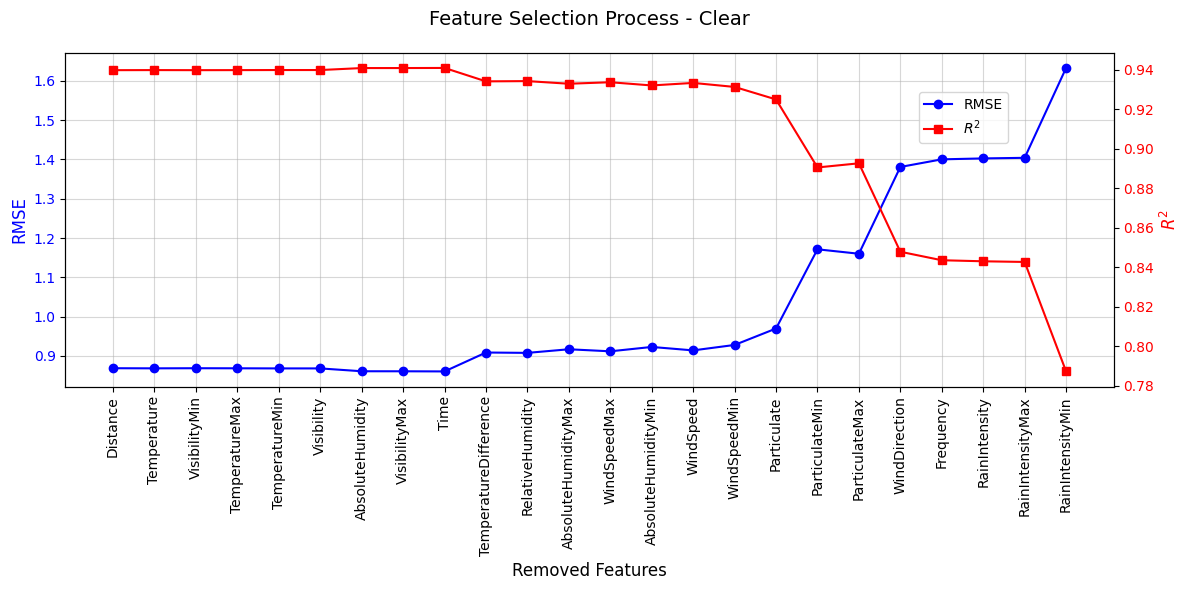

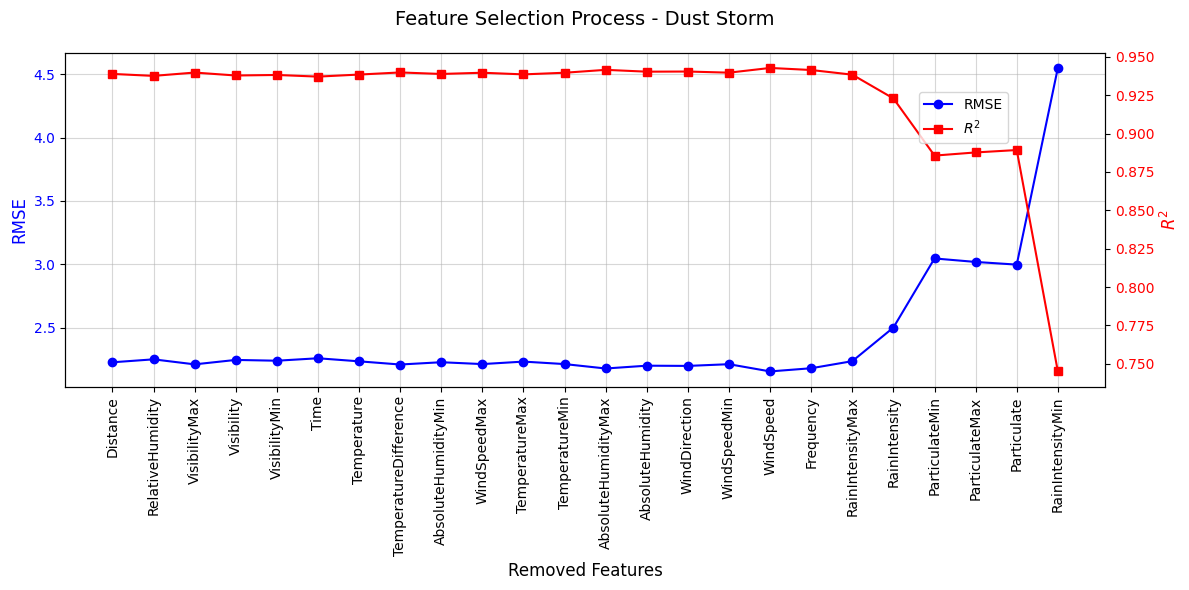

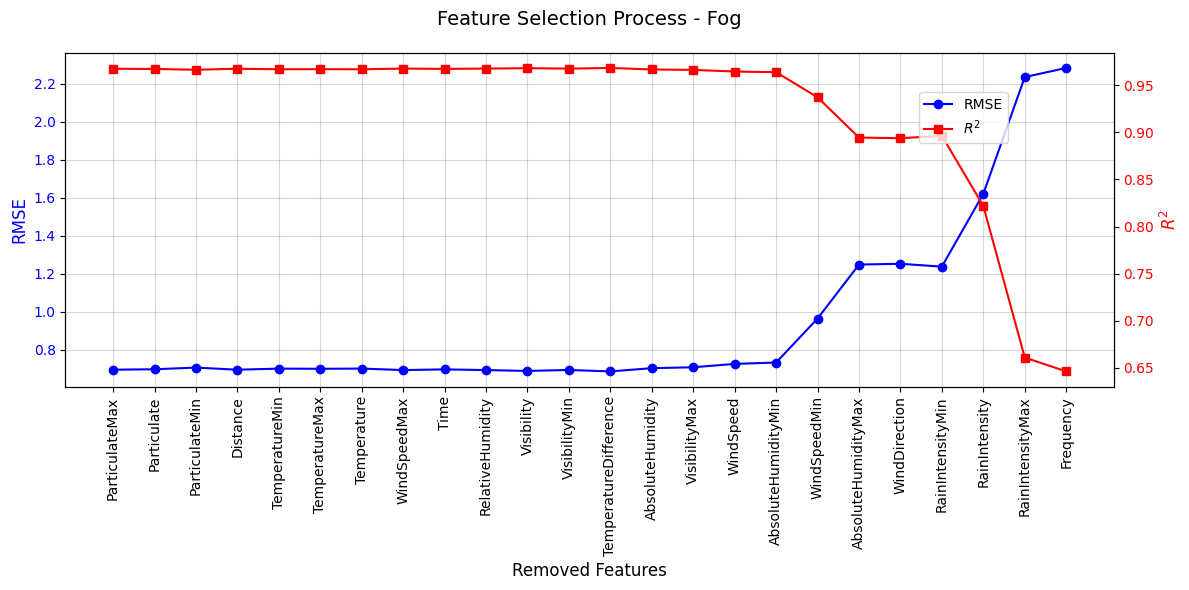

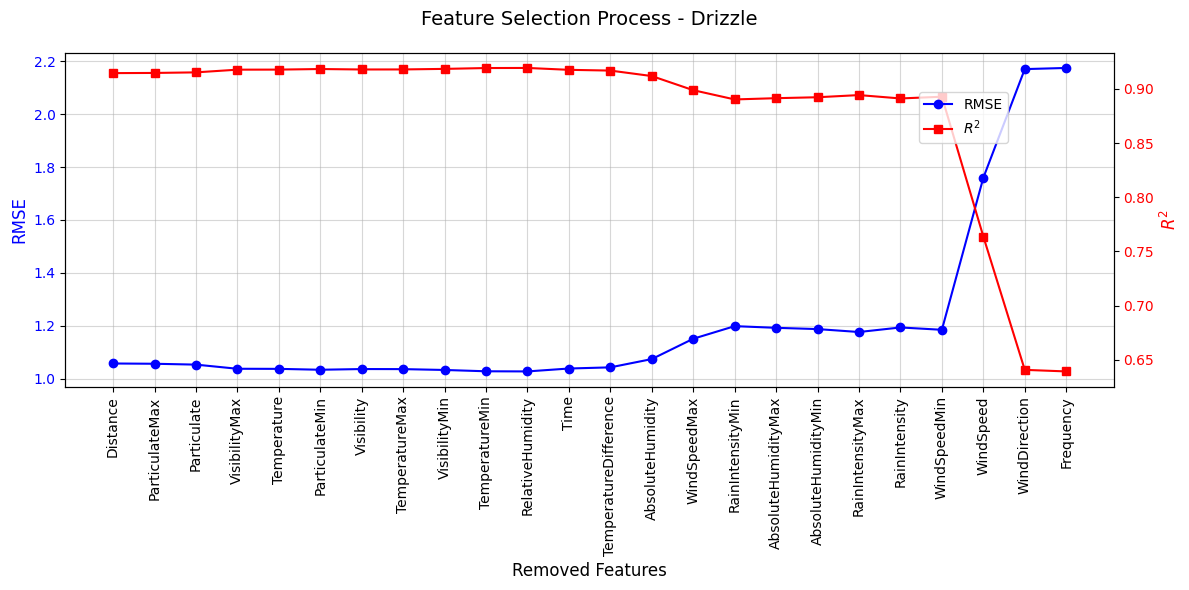

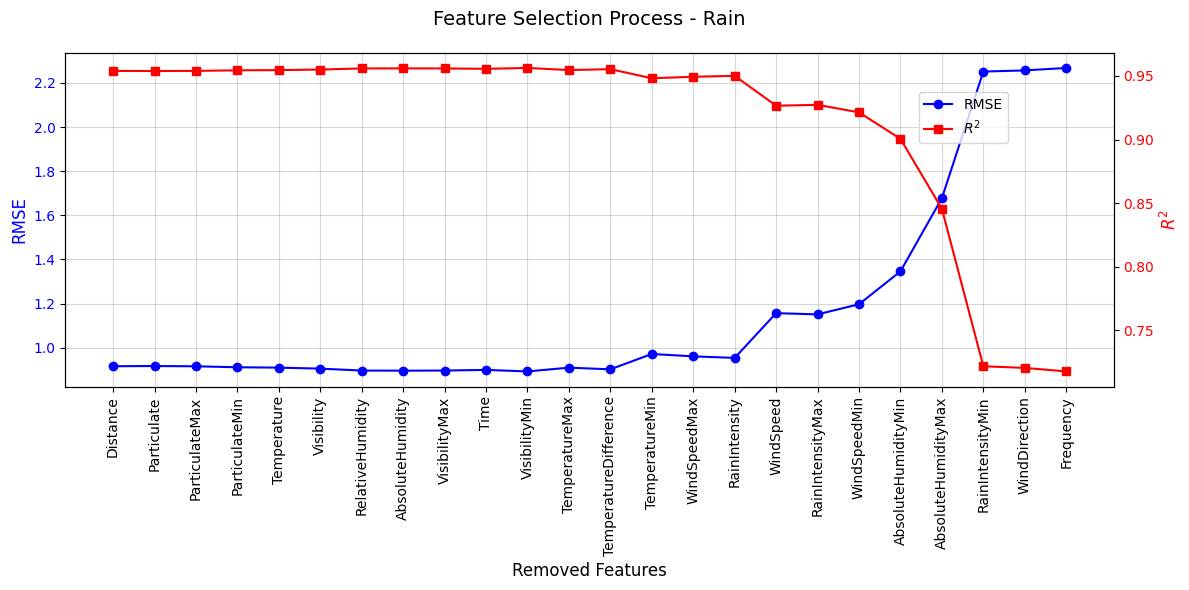

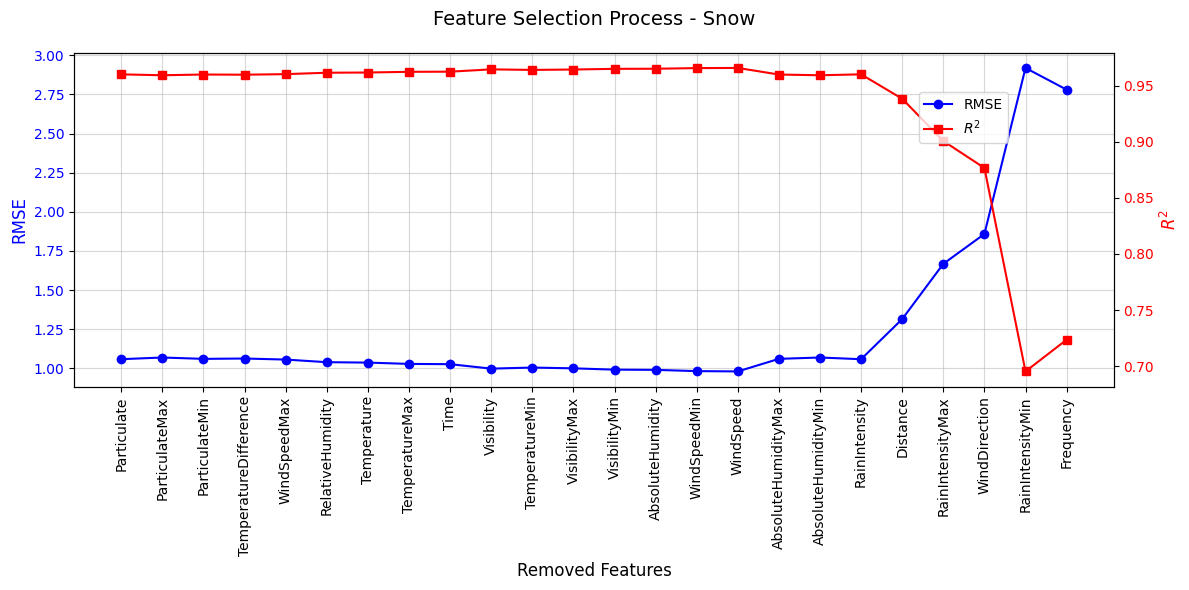

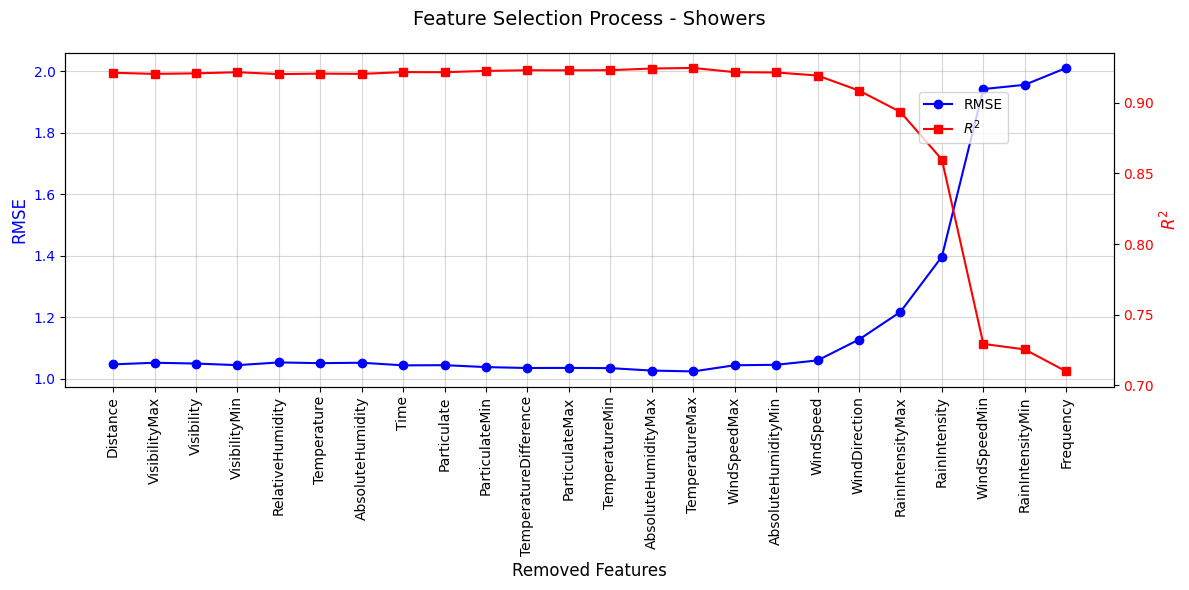

In [22]:
plot_feature_selection(results, weather_categories={
        0: 'Clear',
        3: 'Dust Storm',
        4: 'Fog',
        5: 'Drizzle',
        6: 'Rain',
        7: 'Snow',
        8: 'Showers'
    })


## FOR RFL

In [ ]:
rfl_data = data.drop("FSO_Att", axis = 1).copy()
rfl_data['SYNOPCode'] = rfl_data['SYNOPCode'].astype('category')


print(rfl_data.dtypes) 
print(rfl_data['SYNOPCode'].head())  

RFL_Att                   float64
AbsoluteHumidity          float64
AbsoluteHumidityMax       float64
AbsoluteHumidityMin       float64
Distance                  float64
Frequency                   int64
Particulate               float64
ParticulateMax            float64
ParticulateMin            float64
RainIntensity             float64
RainIntensityMax          float64
RainIntensityMin          float64
RelativeHumidity          float64
SYNOPCode                category
Temperature               float64
TemperatureDifference     float64
TemperatureMax            float64
TemperatureMin            float64
Time                        int64
Visibility                float64
VisibilityMax             float64
VisibilityMin             float64
WindDirection             float64
WindSpeed                 float64
WindSpeedMax              float64
WindSpeedMin              float64
dtype: object
0    0
1    0
2    0
3    0
4    0
Name: SYNOPCode, dtype: category
Categories (7, int64): [0, 3, 4, 5

In [16]:
print(rfl_data['SYNOPCode'].value_counts())

SYNOPCode
0    56964
6    25018
5     6605
8     1716
4      466
7      419
3      191
Name: count, dtype: int64


In [17]:
print("\nRF Dataset Summary Statistics:")
rfl_data.describe()


RF Dataset Summary Statistics:


,RFL_Att,AbsoluteHumidity,AbsoluteHumidityMax,AbsoluteHumidityMin,Distance,Frequency,Particulate,ParticulateMax,ParticulateMin,RainIntensity,...,TemperatureMax,TemperatureMin,Time,Visibility,VisibilityMax,VisibilityMin,WindDirection,WindSpeed,WindSpeedMax,WindSpeedMin
count,91379.000000,91379.000000,91379.000000,91379.000000,91379.000000,9.137900e+04,91379.000000,91379.000000,91379.000000,91379.000000,...,91379.000000,91379.000000,91379.000000,91379.000000,91379.000000,91379.000000,91379.000000,91379.000000,91379.000000,91379.000000
mean,11.619098,9.553919,10.032760,9.076251,3297.930328,7.850005e+10,27.065979,28.417120,25.717089,0.246973,...,13.166020,11.904558,11.373193,32986.417484,34636.684647,31331.618978,89.043304,0.739065,1.851020,0.702242
std,3.438873,5.858577,6.162798,5.575927,1224.305893,5.000027e+09,72.134023,75.761896,68.595239,1.642323,...,9.589755,8.694028,6.942229,24713.874445,25978.845228,23497.873065,26.415610,0.871314,1.762698,0.828796
min,0.027142,1.141556,1.238270,1.049744,2012.000148,7.350000e+10,0.000000,0.000000,0.000000,0.000000,...,-6.693373,-7.270075,0.000000,10.151990,11.029667,9.484346,0.000000,0.000000,0.000000,0.000000
25%,10.829331,4.958993,5.205861,4.709511,2019.431812,7.350000e+10,0.000000,0.000000,0.000000,0.000000,...,4.905387,4.438425,5.000000,11158.598400,11721.447542,10588.793237,82.976727,0.076749,0.512667,0.072912
50%,11.856560,6.870737,7.205499,6.524046,2959.863686,8.350000e+10,0.000000,0.000000,0.000000,0.000000,...,10.803943,9.774467,11.000000,26378.636210,27686.214032,25047.188462,90.867362,0.437995,1.323101,0.416274
75%,12.847944,14.049470,14.782679,13.379256,4820.890157,8.350000e+10,16.947618,17.775980,16.038090,0.000000,...,22.470382,20.322434,17.000000,53493.821285,56092.212376,50797.690402,98.482652,1.088621,2.681788,1.036574
max,46.893150,24.790883,26.407305,24.268431,4827.999971,8.350000e+10,1621.001906,1753.747866,1500.666382,87.264777,...,40.771383,36.724191,23.000000,75004.999150,82503.130084,74999.343414,360.000000,7.799086,16.421115,7.252319


## RFL_Feature Selection

C:\Users\发烧了啊\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Initial RMSE: 0.17956326032409334, R²: 0.9972734873278324


C:\Users\发烧了啊\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Removing feature: WindDirection
RMSE increase: 0.000, R² decrease: 0.000


C:\Users\发烧了啊\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Removing feature: WindSpeedMin
RMSE increase: -0.000, R² decrease: -0.000


C:\Users\发烧了啊\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Removing feature: WindSpeed
RMSE increase: -0.000, R² decrease: -0.000


C:\Users\发烧了啊\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Removing feature: Particulate
RMSE increase: -0.000, R² decrease: -0.000


C:\Users\发烧了啊\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Removing feature: WindSpeedMax
RMSE increase: -0.000, R² decrease: -0.000


C:\Users\发烧了啊\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Removing feature: AbsoluteHumidityMax
RMSE increase: -0.001, R² decrease: -0.000


C:\Users\发烧了啊\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Removing feature: TemperatureMin
RMSE increase: -0.002, R² decrease: -0.000


C:\Users\发烧了啊\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Removing feature: VisibilityMin
RMSE increase: -0.001, R² decrease: -0.000


C:\Users\发烧了啊\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Removing feature: AbsoluteHumidityMin
RMSE increase: -0.002, R² decrease: -0.000


C:\Users\发烧了啊\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Removing feature: ParticulateMin
RMSE increase: -0.003, R² decrease: -0.000


C:\Users\发烧了啊\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Removing feature: TemperatureDifference
RMSE increase: -0.001, R² decrease: -0.000


C:\Users\发烧了啊\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Removing feature: VisibilityMax
RMSE increase: 0.010, R² decrease: 0.000


C:\Users\发烧了啊\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Removing feature: Time
RMSE increase: -0.001, R² decrease: -0.000


C:\Users\发烧了啊\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Removing feature: Frequency
RMSE increase: 0.028, R² decrease: 0.001


C:\Users\发烧了啊\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Removing feature: TemperatureMax
RMSE increase: 0.060, R² decrease: 0.002


C:\Users\发烧了啊\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Removing feature: ParticulateMax
RMSE increase: -0.001, R² decrease: -0.000


C:\Users\发烧了啊\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Removing feature: RelativeHumidity
RMSE increase: 0.001, R² decrease: 0.000


C:\Users\发烧了啊\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Removing feature: SYNOPCode
RMSE increase: 0.004, R² decrease: 0.000


C:\Users\发烧了啊\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Removing feature: Visibility
RMSE increase: 0.000, R² decrease: 0.000


C:\Users\发烧了啊\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Removing feature: RainIntensityMin
RMSE increase: 0.046, R² decrease: 0.002


C:\Users\发烧了啊\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Removing feature: Temperature
RMSE increase: -0.001, R² decrease: -0.000


C:\Users\发烧了啊\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Removing feature: RainIntensityMax
RMSE increase: 0.077, R² decrease: 0.005


C:\Users\发烧了啊\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Removing feature: Distance
RMSE increase: -0.001, R² decrease: -0.000


C:\Users\发烧了啊\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Removing feature: RainIntensity
RMSE increase: 0.424, R² decrease: 0.043
Stopping selection. RMSE increase (0.424) > 0.1 or R² decrease (0.043) > 0.02


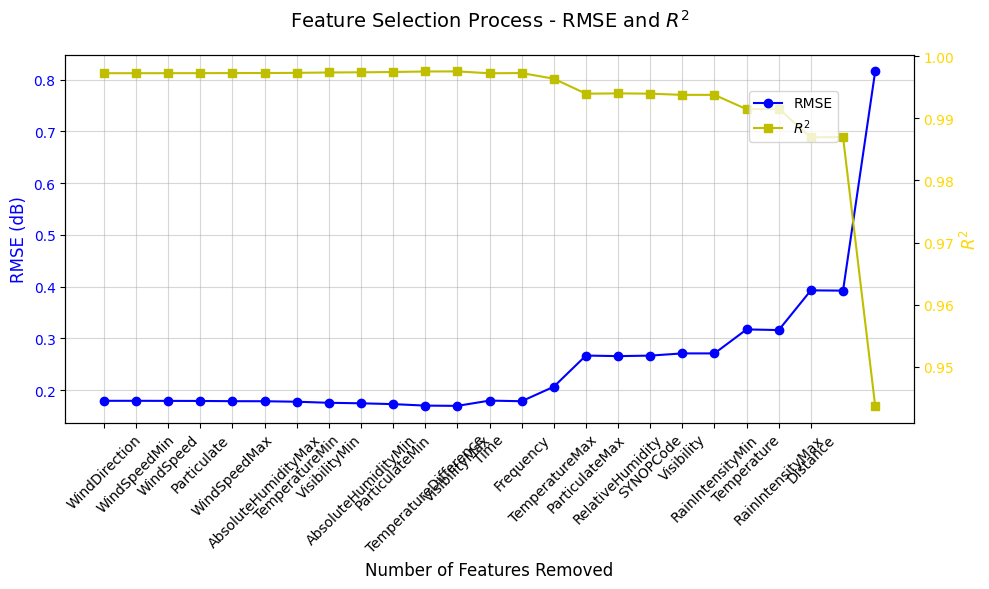

Important Features: ['AbsoluteHumidity', 'RainIntensity']
Removed Features: ['WindDirection', 'WindSpeedMin', 'WindSpeed', 'Particulate', 'WindSpeedMax', 'AbsoluteHumidityMax', 'TemperatureMin', 'VisibilityMin', 'AbsoluteHumidityMin', 'ParticulateMin', 'TemperatureDifference', 'VisibilityMax', 'Time', 'Frequency', 'TemperatureMax', 'ParticulateMax', 'RelativeHumidity', 'SYNOPCode', 'Visibility', 'RainIntensityMin', 'Temperature', 'RainIntensityMax', 'Distance']
Decisions Log:
Removed: WindDirection
Removed: WindSpeedMin
Removed: WindSpeed
Removed: Particulate
Removed: WindSpeedMax
Removed: AbsoluteHumidityMax
Removed: TemperatureMin
Removed: VisibilityMin
Removed: AbsoluteHumidityMin
Removed: ParticulateMin
Removed: TemperatureDifference
Removed: VisibilityMax
Removed: Time
Removed: Frequency
Removed: TemperatureMax
Removed: ParticulateMax
Removed: RelativeHumidity
Removed: SYNOPCode
Removed: Visibility
Removed: RainIntensityMin
Removed: Temperature
Removed: RainIntensityMax
Removed: D

In [18]:
important_features, removed_features, rmse_list, r2_list, decisions = feature_selection(
    data=rfl_data,
    target_column='RFL_Att',
    drop_columns=[],  
    rmse_threshold=0.1,  
    r2_threshold=0.02    
)

## General Model for RFL

In [19]:
general_model, general_params, train_rmse, train_r2, test_rmse, test_r2 = general_model_evaluation(
    data=rfl_data,
    target_column='RFL_Att',
    features=['AbsoluteHumidity', 'RainIntensity']  
)

# 打印结果
print("General Model 最优超参数:", general_params)
print("训练集性能 -> RMSE:", train_rmse, ", R²:", train_r2)
print("测试集性能 -> RMSE:", test_rmse, ", R²:", test_r2)

Optimal Parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}


C:\Users\发烧了啊\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Training RMSE: 1.7634838932634869, R^2: 0.7378907174507647
Test RMSE: 1.868939480513448, R^2: 0.7023276525798313
General Model 最优超参数: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}
训练集性能 -> RMSE: 1.7634838932634869 , R²: 0.7378907174507647
测试集性能 -> RMSE: 1.868939480513448 , R²: 0.7023276525798313


C:\Users\发烧了啊\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## Special Model for RFL

In [24]:
optimal_params = {
    'max_depth': 10,
    'min_samples_split': 5,
    'n_estimators': 200,
    'random_state': 42,
    'n_jobs': -1
}

weather_categories = {
    0: 'Clear',
    3: 'Dust Storm',
    4: 'Fog',
    5: 'Drizzle',
    6: 'Rain',
    7: 'Snow',
    8: 'Showers'
}

# 提前划分数据集
synop_data_splits = prepare_synop_data(rfl_data, 'RFL_Att', 'SYNOPCode', weather_categories)

# 使用划分好的数据集训练模型
results, trained_models = train_individual_synop(synop_data_splits, optimal_params)


准备数据集 - SYNOPCode 0 (Clear)
训练集大小: (39874, 24), 测试集大小: (17090, 24), 剩余特征: ['AbsoluteHumidity', 'AbsoluteHumidityMax', 'AbsoluteHumidityMin', 'Distance', 'Frequency', 'Particulate', 'ParticulateMax', 'ParticulateMin', 'RainIntensity', 'RainIntensityMax', 'RainIntensityMin', 'RelativeHumidity', 'Temperature', 'TemperatureDifference', 'TemperatureMax', 'TemperatureMin', 'Time', 'Visibility', 'VisibilityMax', 'VisibilityMin', 'WindDirection', 'WindSpeed', 'WindSpeedMax', 'WindSpeedMin']
准备数据集 - SYNOPCode 3 (Dust Storm)
训练集大小: (133, 24), 测试集大小: (58, 24), 剩余特征: ['AbsoluteHumidity', 'AbsoluteHumidityMax', 'AbsoluteHumidityMin', 'Distance', 'Frequency', 'Particulate', 'ParticulateMax', 'ParticulateMin', 'RainIntensity', 'RainIntensityMax', 'RainIntensityMin', 'RelativeHumidity', 'Temperature', 'TemperatureDifference', 'TemperatureMax', 'TemperatureMin', 'Time', 'Visibility', 'VisibilityMax', 'VisibilityMin', 'WindDirection', 'WindSpeed', 'WindSpeedMax', 'WindSpeedMin']
准备数据集 - SYNOPCode 4 (Fog

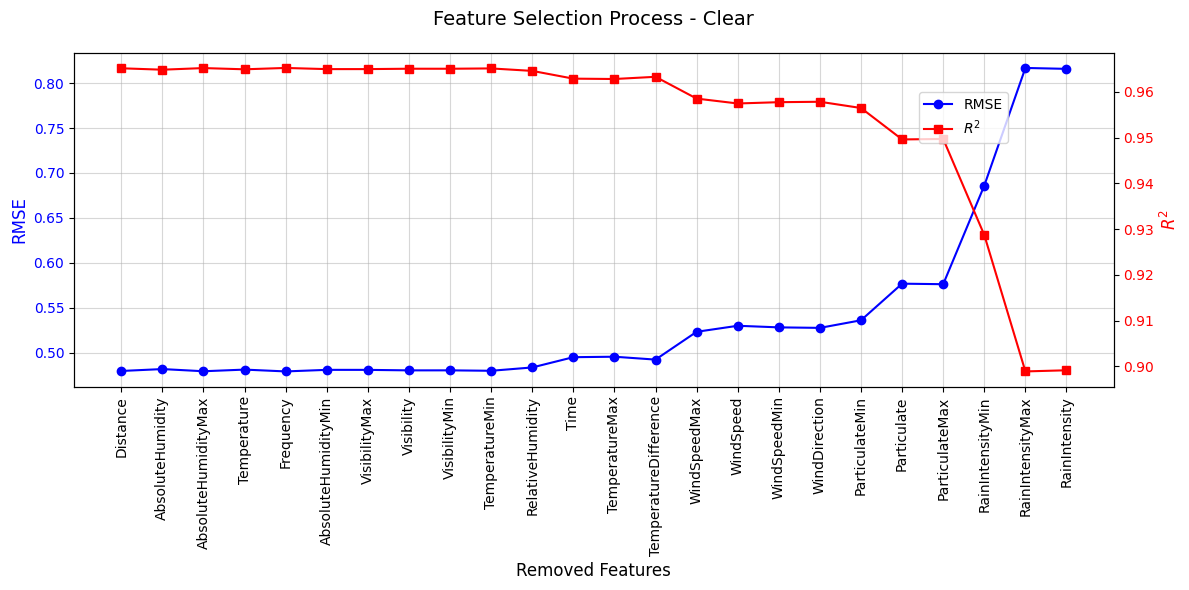

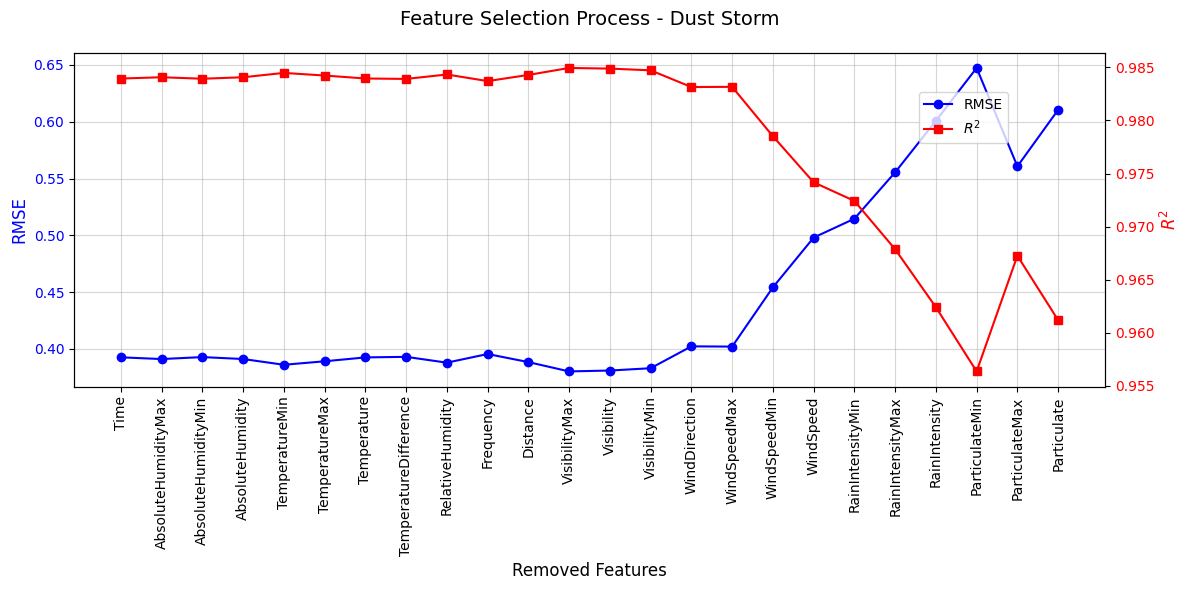

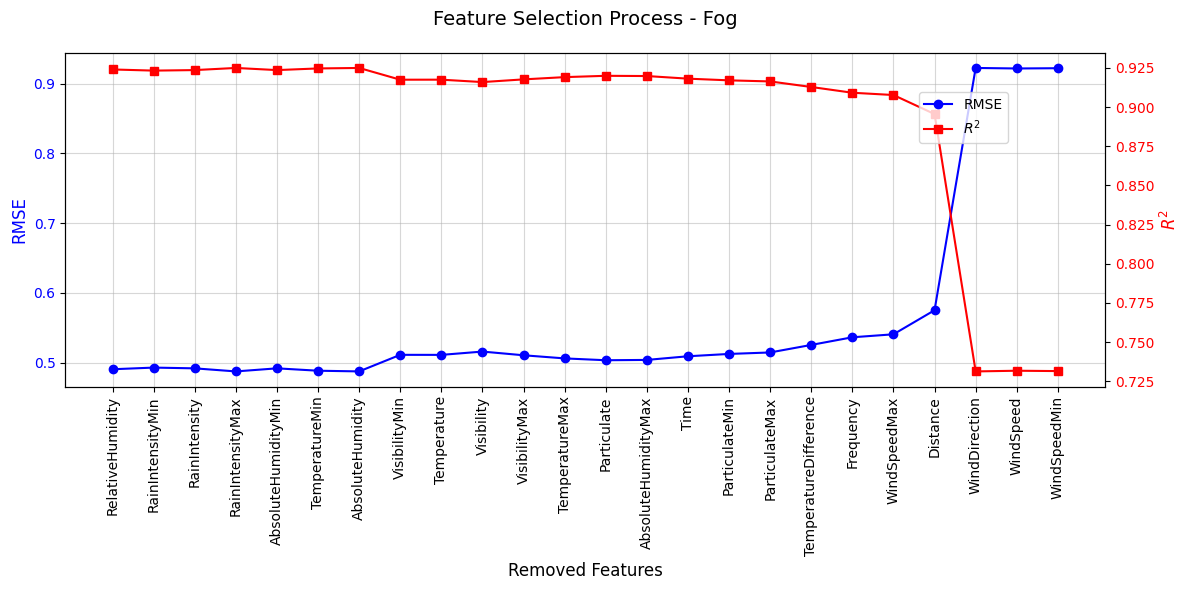

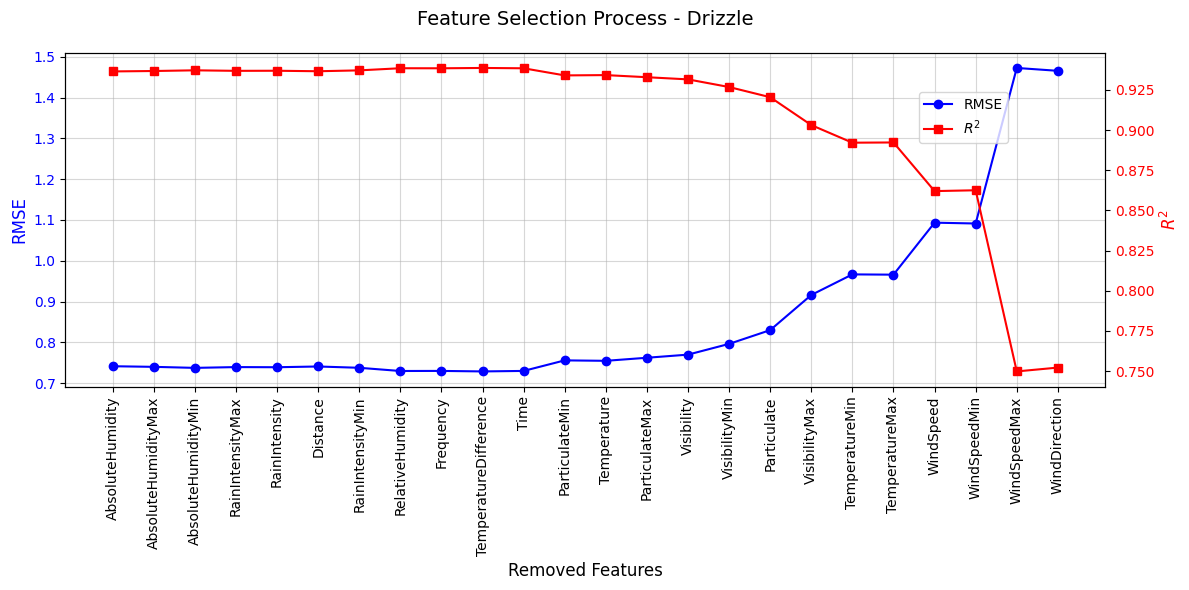

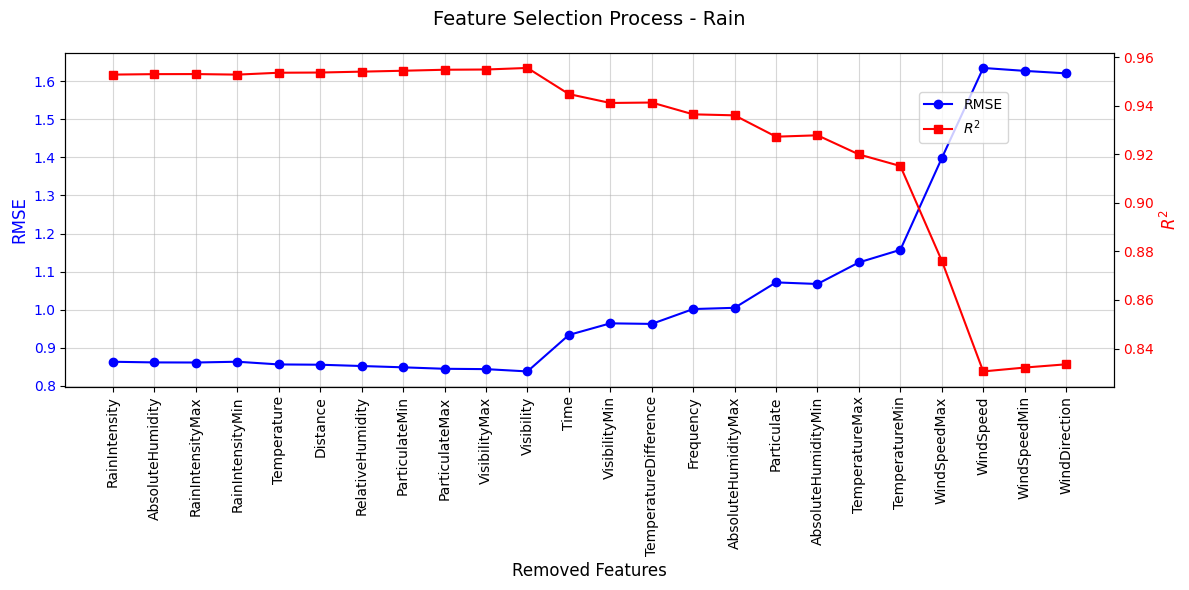

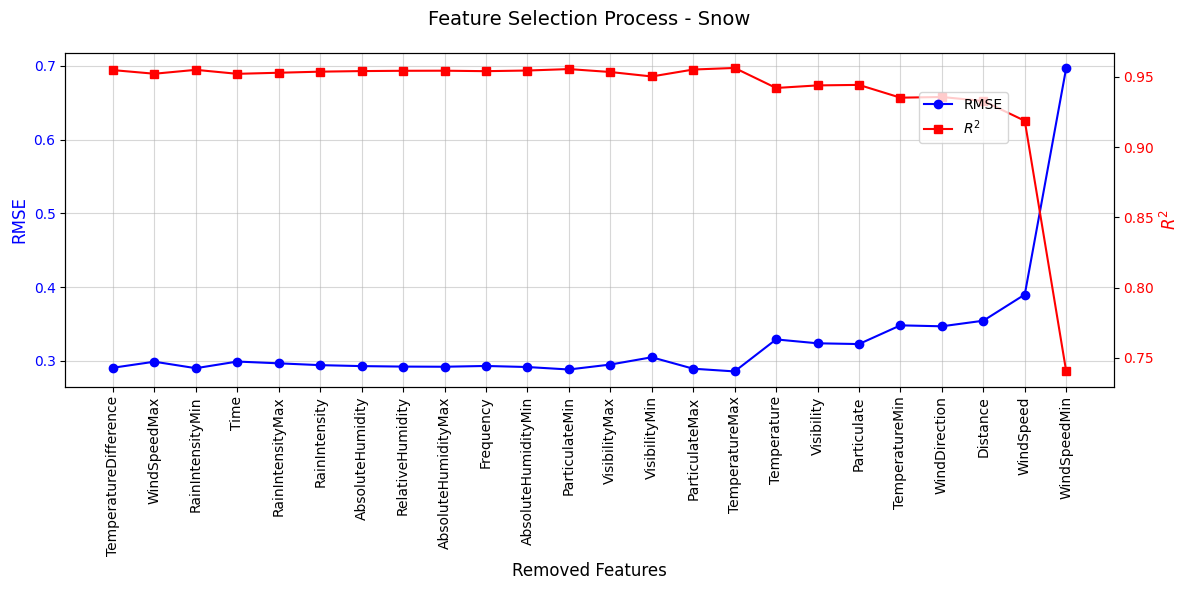

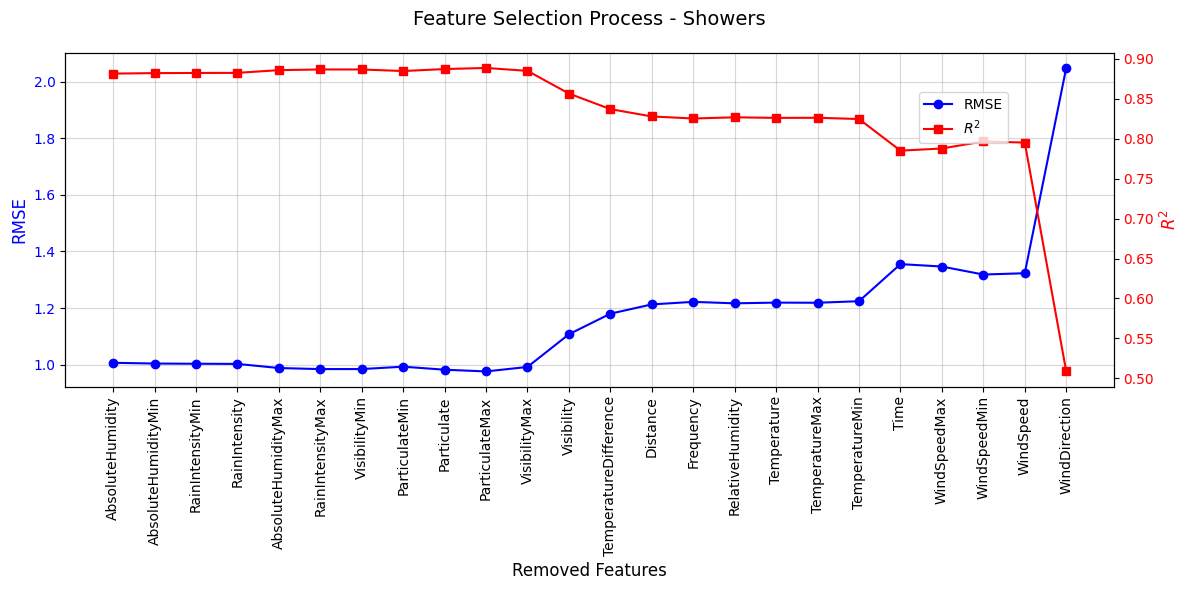

In [25]:
plot_feature_selection(results, weather_categories={
        0: 'Clear',
        3: 'Dust Storm',
        4: 'Fog',
        5: 'Drizzle',
        6: 'Rain',
        7: 'Snow',
        8: 'Showers'
    })